# Project: IMDB Movie Data Analysis

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analising the data associated to the popularity of a movie. In particular, we will be focusing on the criterias that make one movie more popular than an other and how this difference between movies influences its success. In other words, we will be answering the following questions:
> #### What makes one movie 'BETTER' than an other one? And why this 'other movie' is achieving less success than the first?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sb
# Remember to include a 'magic word' so that your visualizations are plotted
import matplotlib.pyplot as mplt
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

### General Properties

First of all, let's start by throwing a look at our dataset so that we can have a clearer idea of the path to follow in the analysis.

In [2]:
#loading the dataset
db= pd.read_csv('tmdb-movies.csv') 
#printing the first 5 lines to have an overview about the general aspect of the dataset
db.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [81]:
#counting unique values in each of the columns
db.nunique()

popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
director                 5067
overview                10847
runtime                   247
genres                   2039
production_companies     7445
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [84]:
db.duplicated()

3894     False
538      False
2269     False
1200     False
6911     False
         ...  
2373     False
3822     False
4882     False
7772     False
10865    False
Name: original_title, Length: 10866, dtype: bool

Now we have as we have a clear idea, let's move to:

### Data Cleaning
After uploading the data, we notice that there are some missing values in the imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies columns. And since we are intrested in determining what make a movie better than an other one, we will not be needing the id, imdb_id, homepage, tagline, keywords, release_date and vote_count columns.

Note that the vote_average column is a lot more useful than the vote_count column as they are expressing the same information, that is why I decided to drop the last one. But none of the id and the imdb_id is useful because they do the same job as the original title; distinguishing between movies, that's the reason why I decided to drop them.
The missing values in the columns remaining columns are a lot fewer than the global amount of present data, which means that they won't affect the analysis, that's why I left them as they are.

In [ ]:
db.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'release_date', 'vote_count'], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

In order to answer the questions we have to investigate about the corrolation between the success parameters (denote the vote average, the popularity, the revenue) and the other factors; including the casts, the budget, the runtime, the director, the production company and the genre.

A naive observation will lead us to suppose the following:

There is a correlation between a **'GOOD'** movie and if:
> Its actors are well-known.

> Its director is also well-known.

> It is popular.

> Its runtime is appropriate (means that time was sufficient to represente the story in a clear way and the messages are transmitted to the audience fluently).

> Its budget is high.

> It touches the emotions of the greatest part of people, which implies that its genre is most likely to be drama, romance, comedy, etc.

Obviously there is a correlation between the popularity of a movie and the fame of its actors and its director, but:
**Does that mean that this movie is having  higher vote average?**

In fact, yes. By observing the head of the dataset, we assume the existence of a relationship between the fame of actors having a relatively good rate. But: 

> **Are those the only factors that are contributing in allowing the film to achieve more success?**

So first let's see the information that our dataset is providing by answering the next questions.

## Does the popularity of a film implies that it's having a higher vote average?

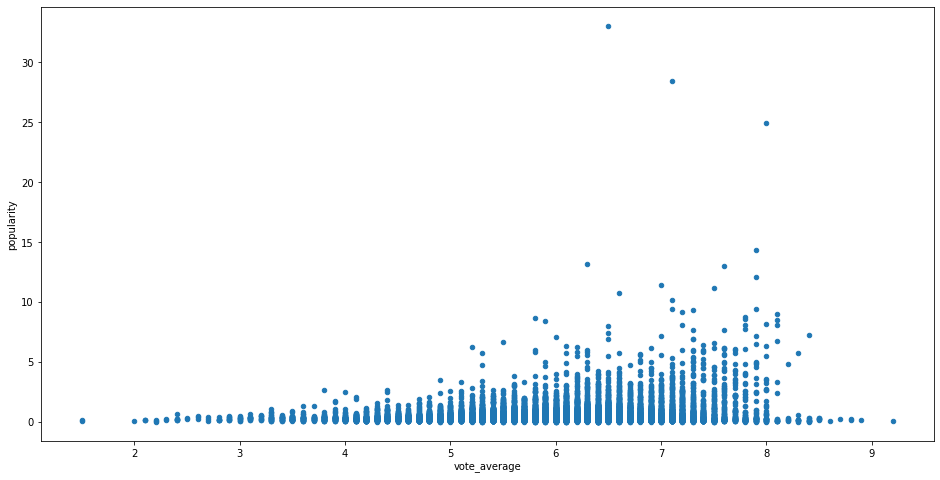

In [67]:
db.plot(x='vote_average',y='popularity',kind='scatter', figsize=(16, 8));

The movie having a rate that is greater that the average rate(aproximately 6) tends to be more popular, but there is no implying, because there is a good part of movies having a really high rate but although they do not have a high popularity.

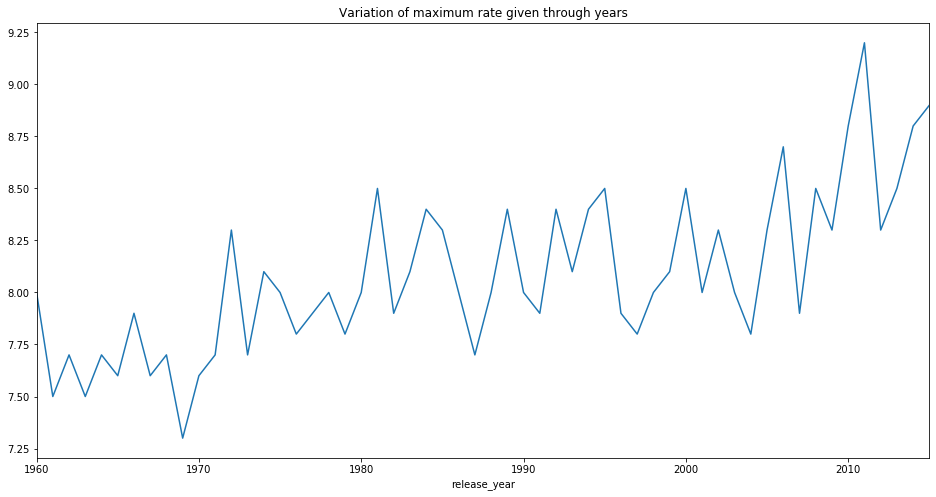

In [64]:
c=db.groupby('release_year').max()['vote_average']
c.plot(title="Variation of maximum rate given through years", figsize=(16, 8),);

This plot shows the evaluation of given ratings to movie through time. Thus we observe that the quality of movies is increasing globally with some kind of periodicity in its variation(ups and downs), and that what gives it that sharp pace.

## Is the rate that a movie gets dependent on its runtime?

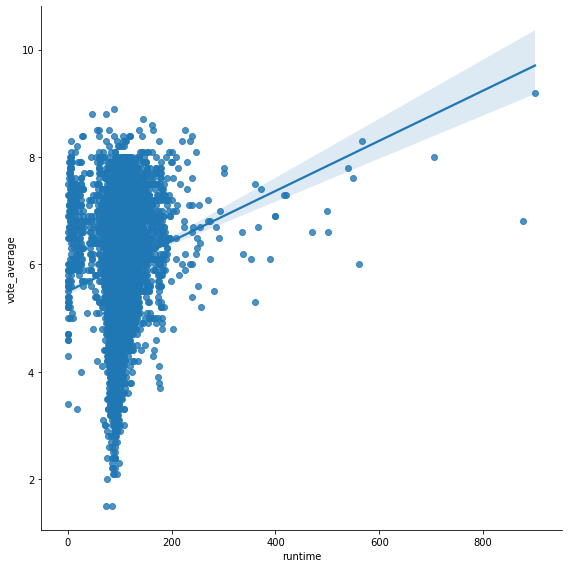

In [73]:
g = sb.lmplot(x="runtime", y="vote_average",
               truncate=True, height=8, data=db)
g.set_axis_labels("runtime", "vote_average")

We notice that the vote average is somehow propotional to the runtime. But the majority of films that has a runtime under 200 minutes tends to have a higher vote average.

## Does the budget influences the success of a movie?

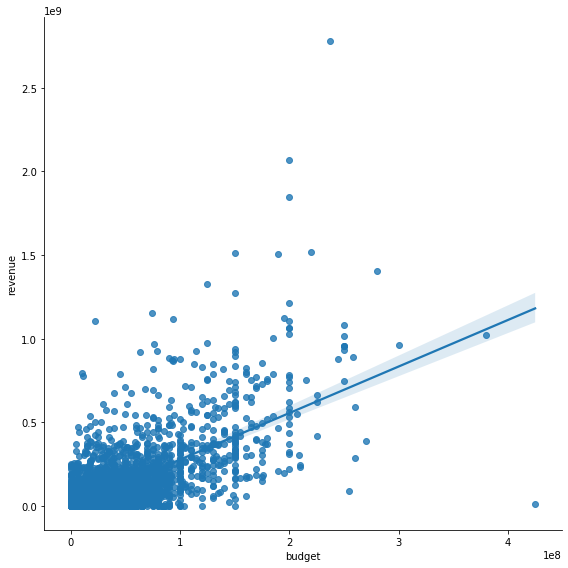

In [120]:
h = sb.lmplot(x="budget", y="revenue",
               truncate=True, height=8, data=db)
h.set_axis_labels("budget", "revenue")

It seems to be that the average budget is associated with the high revenue, but it is evident that the high budget cannot always ensure that the income will be high as well.

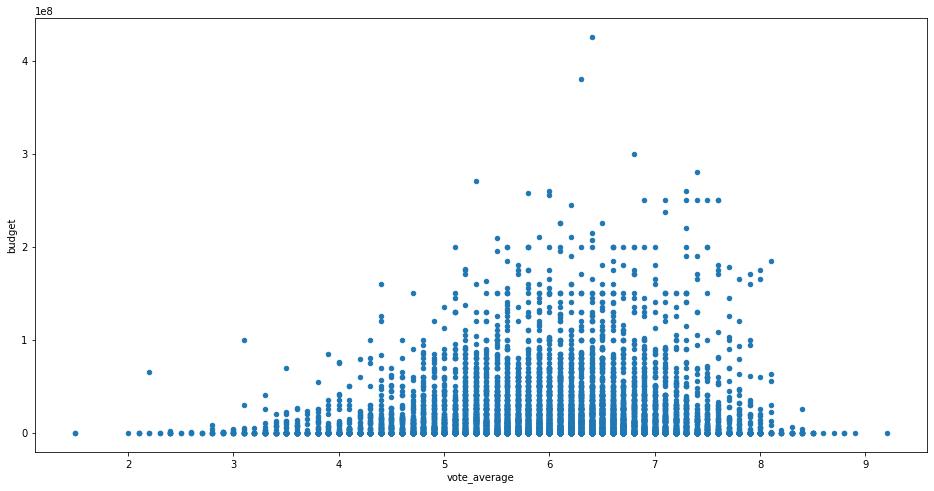

In [79]:
db.plot(x='vote_average', y='budget', kind = 'scatter', figsize=(16, 8));

We can obviously see that the high budget has nothing to do with the high vote average. Moreover, it is clear that a movie with a budget between 0 and 3 billion Dollars exclusive tends to have a higher vote average.

Since a movie simply can not be made with a null investment, the values of budget that are equal to zero are not taken into consideration.

## Does getting a higher rate depends on thouching the emotions of the widest part of people?

In [5]:
db['genres'].value_counts()

Comedy                                            712
Drama                                             712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
                                                 ... 
Adventure|Thriller                                  1
Horror|Thriller|Fantasy|Mystery                     1
Drama|Horror|Comedy|Thriller|Foreign                1
Science Fiction|Adventure|Action|Comedy|Family      1
Adventure|Comedy|Drama|Family|TV Movie              1
Name: genres, Length: 2039, dtype: int64

In [9]:
db.sort_values(by=['vote_average'], inplace=True, ascending=False)
db

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9.2,2011,0.000000,0.0
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,"Compared to girls, research shows that boys in...",88,Documentary,NaN,8.9,2015,0.000000,0.0
2269,0.222293,0,0,Life Cycles,NaN,Derek Frankowski,Life Cycles tells a spectacular story of the b...,47,Documentary,NaN,8.8,2010,0.000000,0.0
1200,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,This feature-length special consists of three ...,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,8.8,2014,0.000000,0.0
6911,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,145,Music,SMV Enterprises|Columbia Music Video|EMI,8.7,2006,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,0.150035,0,0,Birdemic: Shock and Terror,Alan Bagh|Whitney Moore|Janae Caster|Colton Os...,James Nguyen,A platoon of eagles and vultures attacks the r...,95,Horror|Science Fiction,NaN,2.1,2010,0.000000,0.0
3822,0.159707,0,0,Sand Sharks,Corin Nemec|Brooke Hogan|Vanessa Evigan|Eric S...,Mark Atkins,Just when you thought it was safe to go back t...,87,Comedy|Horror|Science Fiction,Rogue State|Remember Dreaming Productions|Litt...,2.1,2011,0.000000,0.0
4882,0.079281,0,0,Jurassic Shark,Emanuelle Carriere|Christine Emes|Celine Filio...,Brett Kelly,When an oil company unwittingly unleashes a pr...,75,Action|Horror|Science Fiction,Dudez Productions,2.0,2012,0.000000,0.0
7772,0.121120,0,0,Transmorphers,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,Leigh Scott,About a race of alien robots that have conquer...,86,Action|Adventure|Science Fiction,"Asylum, The",1.5,2007,0.000000,0.0


The Drama and Comedy films tend to be the most commun. So we can say that there is a trend to produce Drama and Comedy films since they are considered to be the most widely liked by people, altough the very highest vote average were for documentaries.

**But why?**

A production company is still being a business after all, so it will always search for methods to maximise its income. That's why it will not accord on making a movie that will not bring a great revenue. Hence, those two genres of movies are watched and liked by the greatest part of population, which means that they get a high rating and a great profit.

<a id='conclusions'></a>
# Conclusions

All in all, through this analysis we come up to the following:

>**Results:**

A movie is more likely to gain a higher vote average if:

1. The actors are famous.

2. It is emotional (Drama, comedy, Romance, etc...).          

3. Its budget is suitable (it does not require a very high investment), from this correlation we can derive the correlation between the revenue and the budget: A high budget does not ensure that profits will be high as well.            

4. It has an average runtime (not too long but not too short).\n
    
In addition, the more popular the movie is it is more possible to have a better average rate, but, the good quality of movies does not imply their popularity, although the general quality of movies is increasing through time.

>**Limitations:**

However this dataset is really useful there are a couple of limitations:
    
   First of all, the categorical variables are not really well-structured. Let's take as an example the genres, it would be better seperating all the main known genres instead of setting a whole new one just composed by the old ones seperated by '|', so the main genres will have a boolean value ('1' if true and '0' otherwise) that it is evaluated for every movie; for example if we are having a Romance Comedy movie, the value of comedy and the value of romance will be equal to '1' and the movie will be counted twice, the first because it belongs to the set of comedy, and the second because it is a part of the set of Romance, so that the comparision between the different kinds can be easier and tidier when plotting.
    
   There could be also an average rating for the overview instead of the 'raw' overview itself, because it is evident that this overview may lead us sometimes to make our decision about what movie to watch. And since we do not have the ability to compare the overviews of every single film, a numerical value would be a lot more efficient and practical for analysis.